# Pipeline

In [1]:
import geopandas as gpd

blocks_gdf = gpd.read_parquet('./data/blocks.parquet')[['geometry']]
blocks_gdf.head()

,geometry
0,"POLYGON ((354918.622 6625258.829, 354901.464 6..."
1,"POLYGON ((355412.142 6623378.149, 355411.7 662..."
2,"POLYGON ((353934.329 6625429.433, 353923.453 6..."
3,"POLYGON ((355099.099 6623847.765, 355074.808 6..."
4,"POLYGON ((352766.168 6621954.748, 352744.412 6..."


## Tagging

### Zoning

In [2]:
from my_package.methods.zoning_tagger import ZoningTagger

zt = ZoningTagger(blocks_gdf)
zoning_gdf = zt.run()

2024-12-17 20:21:53.522 | INFO     | my_package.methods.zoning_tagger:_fetch_osm:29 - Fetching OSM data
2024-12-17 20:22:05.035 | SUCCESS  | my_package.methods.zoning_tagger:_fetch_osm:35 - OSM data fetched
2024-12-17 20:22:05.086 | INFO     | my_package.methods.zoning_tagger:_process_osm:39 - Processing OSM data
2024-12-17 20:22:05.100 | SUCCESS  | my_package.methods.zoning_tagger:_process_osm:43 - OSM data processed
2024-12-17 20:22:05.119 | INFO     | my_package.methods.zoning_tagger:_get_probabilities:47 - Calculating probabilities
2024-12-17 20:22:13.704 | SUCCESS  | my_package.methods.zoning_tagger:_get_probabilities:68 - Probabilities calculated


### Relation

### Centrality

### Spatial

In [3]:
from my_package.methods.spatial_tagger import SpatialTagger

st = SpatialTagger(blocks_gdf)
spatial_gdf = st.run()

2024-12-17 20:22:13.722 | INFO     | my_package.methods.spatial_tagger:_fetch_osm:36 - Fetching OSM data
2024-12-17 20:22:53.103 | SUCCESS  | my_package.methods.spatial_tagger:_fetch_osm:41 - OSM data fetched
2024-12-17 20:22:53.361 | INFO     | my_package.methods.spatial_tagger:_process_osm:86 - Processing OSM data
100%|██████████| 4/4 [00:06<00:00,  1.68s/it]
2024-12-17 20:23:00.112 | SUCCESS  | my_package.methods.spatial_tagger:_process_osm:104 - OSM data processed
2024-12-17 20:23:00.174 | INFO     | my_package.methods.spatial_tagger:_get_tags:141 - Getting tags
100%|██████████| 3/3 [00:00<00:00,  8.46it/s]
2024-12-17 20:23:02.084 | SUCCESS  | my_package.methods.spatial_tagger:_get_tags:170 - Tags obtained


## Matrix solver

In [5]:
from my_package.methods.matrix_solver import MatrixSolver

ms = MatrixSolver(blocks_gdf, [zoning_gdf, spatial_gdf])
requirements_gdf = ms.run()

In [13]:
requirements_gdf

,geometry,tags,obligatory_requirements,forbidden_requirements
0,"POLYGON ((354918.622 6625258.829, 354901.464 6...","[Tag.PUBLIC_BUSINESS, Tag.NON_LIVING, Tag.LOW_...","[Requirement.INFRASTRUCTURE_PLACEMENT, Require...","[Requirement.COMMERCIAL_PLACEMENT, Requirement..."
1,"POLYGON ((355412.142 6623378.149, 355411.7 662...","[Tag.ENGINEERING_TRANSPORT, Tag.NON_LIVING, Ta...","[Requirement.INFRASTRUCTURE_PLACEMENT, Require...","[Requirement.COMMERCIAL_PLACEMENT, Requirement..."
2,"POLYGON ((353934.329 6625429.433, 353923.453 6...","[Tag.NON_LIVING, Tag.LOW_RISE, Tag.LOW_DENSITY]","[Requirement.INFRASTRUCTURE_PLACEMENT, Require...","[Requirement.COMMERCIAL_PLACEMENT, Requirement..."
3,"POLYGON ((355099.099 6623847.765, 355074.808 6...","[Tag.RESIDENTIAL, Tag.LIVING, Tag.LOW_RISE, Ta...","[Requirement.INFRASTRUCTURE_PLACEMENT, Require...","[Requirement.COMMERCIAL_PLACEMENT, Requirement..."
4,"POLYGON ((352766.168 6621954.748, 352744.412 6...","[Tag.RESIDENTIAL, Tag.NON_LIVING, Tag.LOW_RISE...","[Requirement.INFRASTRUCTURE_PLACEMENT, Require...","[Requirement.COMMERCIAL_PLACEMENT, Requirement..."
...,...,...,...,...
16315,"POLYGON ((335210.252 6655823.328, 335105.217 6...",[Tag.LOW_DENSITY],[Requirement.INFRASTRUCTURE_PLACEMENT],"[Requirement.COMMERCIAL_PLACEMENT, Requirement..."
16316,"POLYGON ((315582.435 6679561.357, 315523.467 6...",[Tag.LOW_DENSITY],[Requirement.INFRASTRUCTURE_PLACEMENT],"[Requirement.COMMERCIAL_PLACEMENT, Requirement..."
16317,"POLYGON ((316419.909 6679189.653, 316319.749 6...","[Tag.ENGINEERING_TRANSPORT, Tag.LOW_DENSITY]","[Requirement.INFRASTRUCTURE_PLACEMENT, Require...","[Requirement.COMMERCIAL_PLACEMENT, Requirement..."
16318,"POLYGON ((315709.232 6679519.841, 315748.877 6...","[Tag.ENGINEERING_TRANSPORT, Tag.LOW_DENSITY]","[Requirement.INFRASTRUCTURE_PLACEMENT, Require...","[Requirement.COMMERCIAL_PLACEMENT, Requirement..."


## Visualization

/tmp/ipykernel_54701/2236894486.py:7: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  requirements_gdf[requirements_gdf['obligatory_requirements'].apply(lambda reqs : req in reqs)].plot(color='green', ax=ax)
/tmp/ipykernel_54701/2236894486.py:8: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  requirements_gdf[requirements_gdf['forbidden_requirements'].apply(lambda reqs : req in reqs)].plot(color='red', ax=ax)
/tmp/ipykernel_54701/2236894486.py:7: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  requirements_gdf[requirements_gdf['obligatory_requirements'].apply(lambda reqs : req in reqs)].plot(color='green', ax=ax)


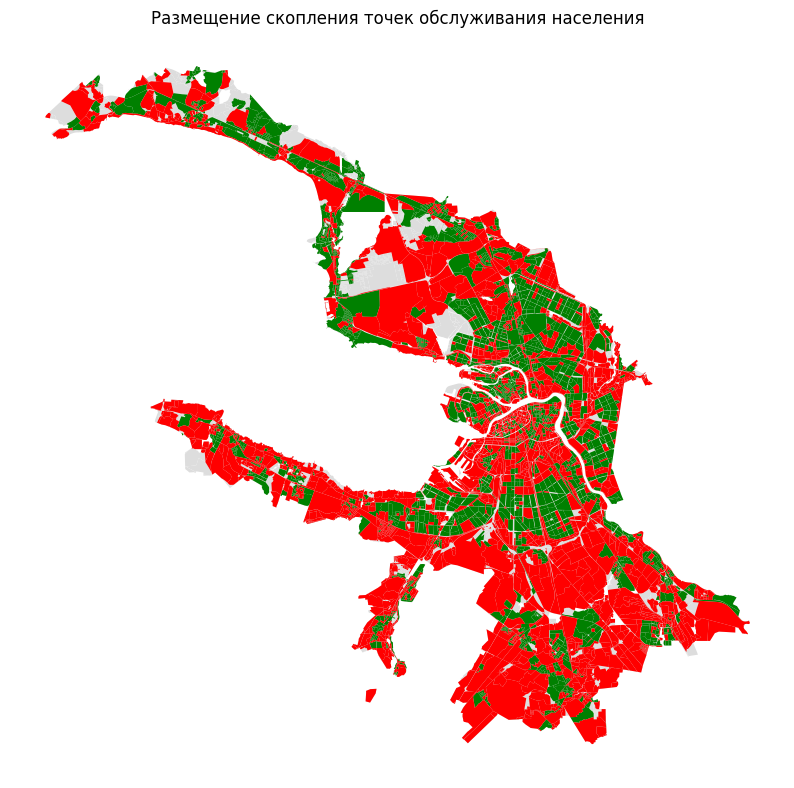

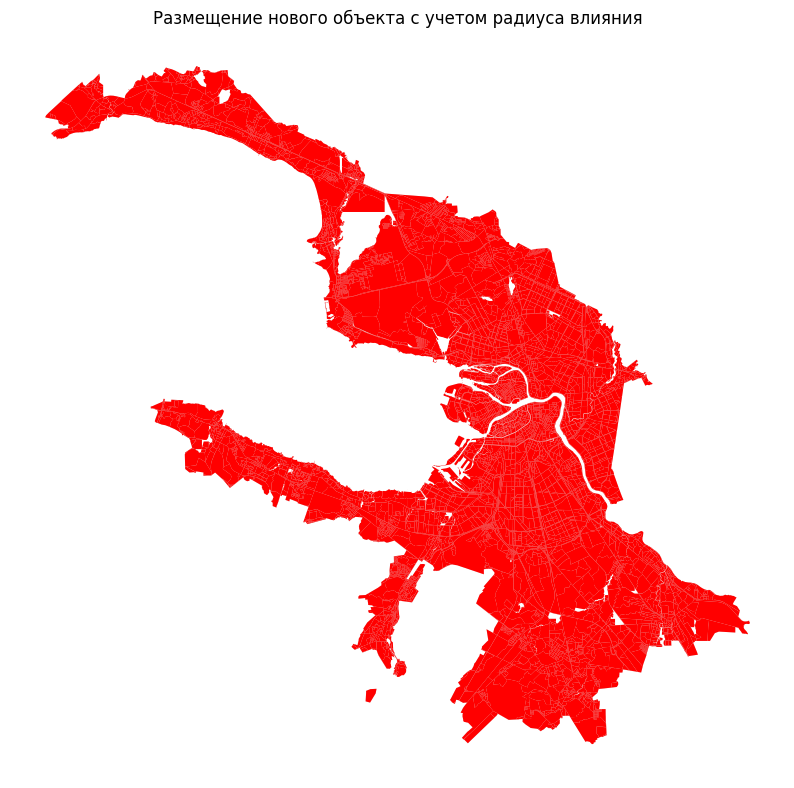

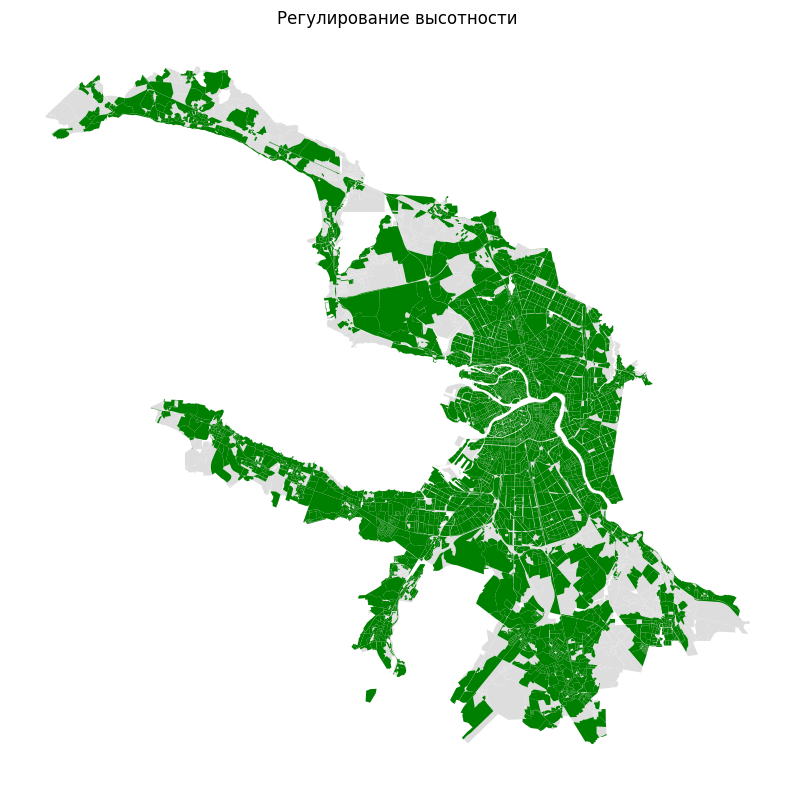

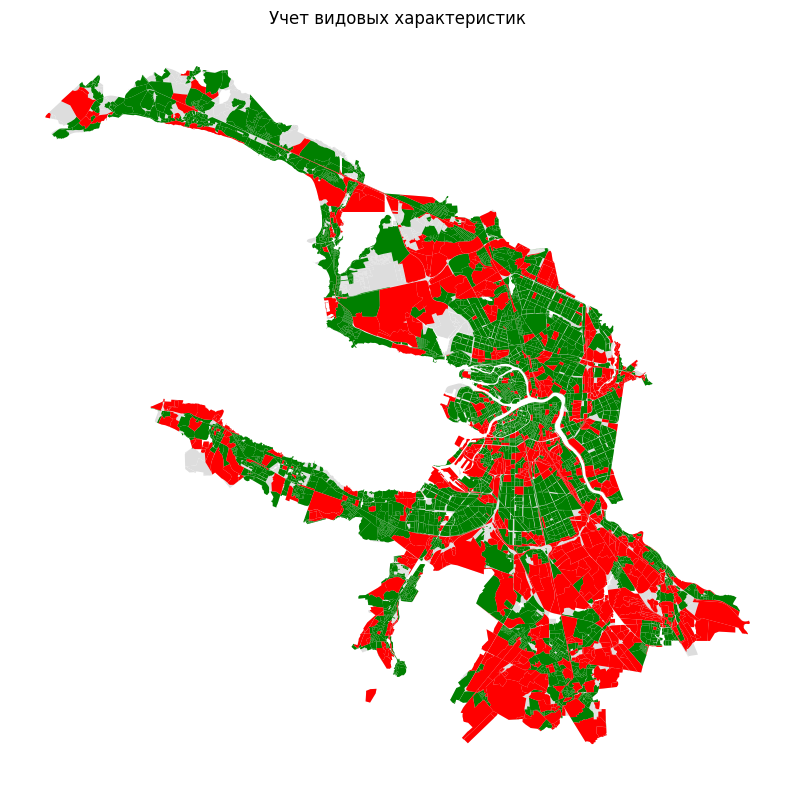

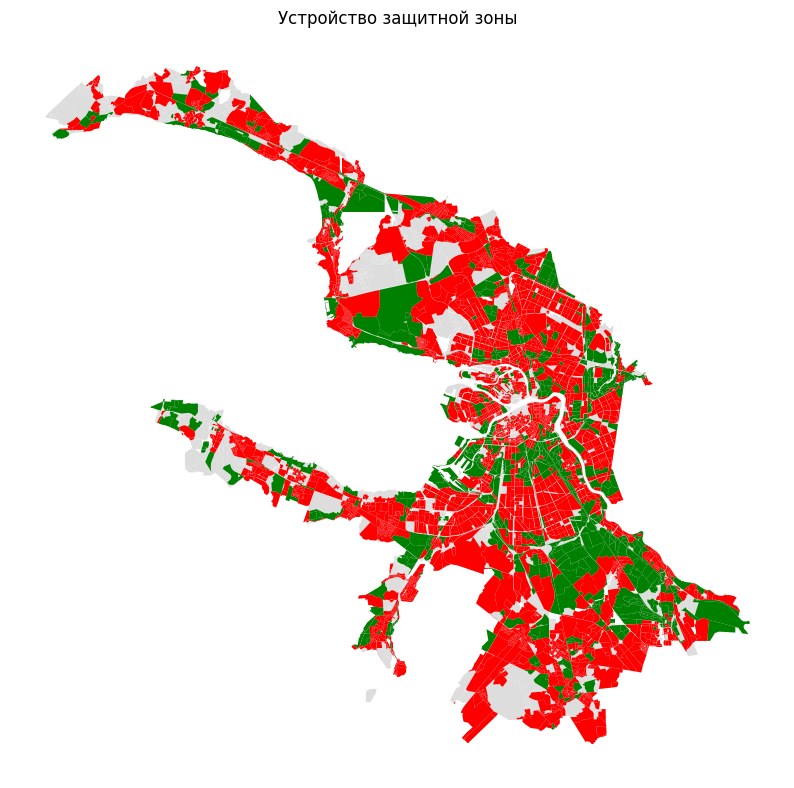

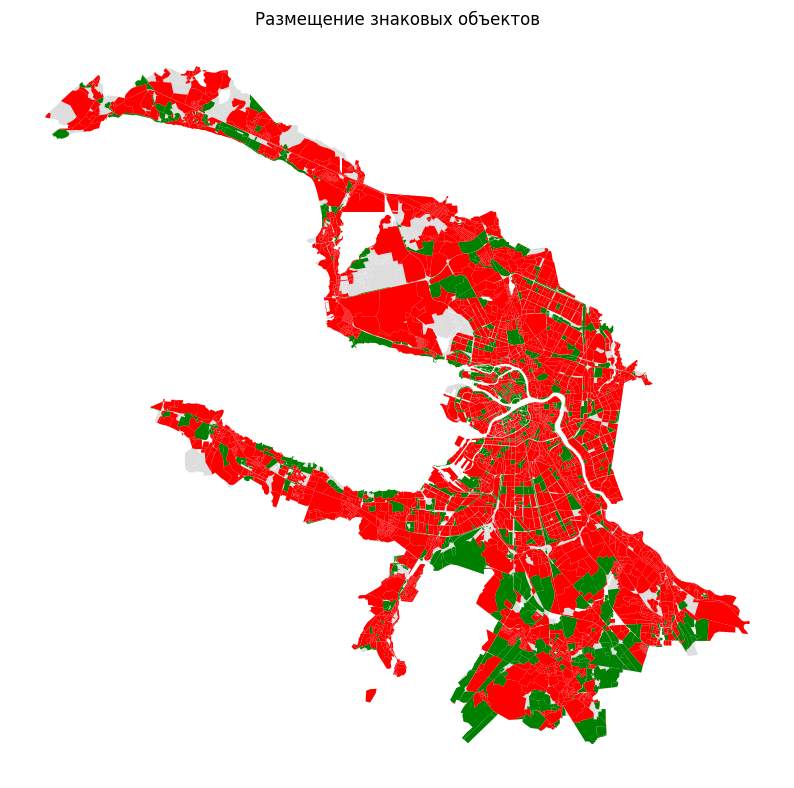

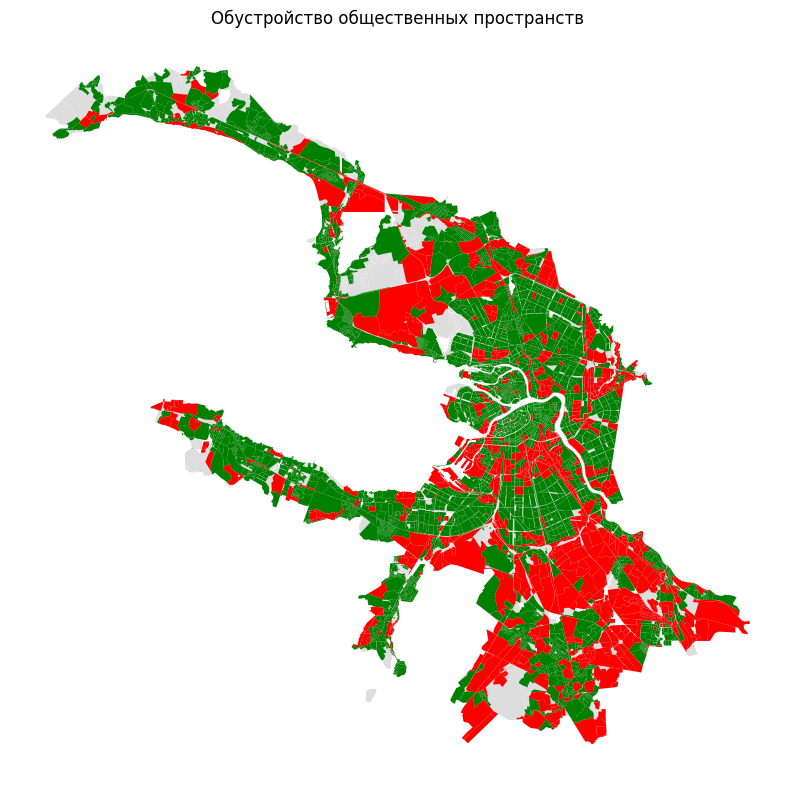

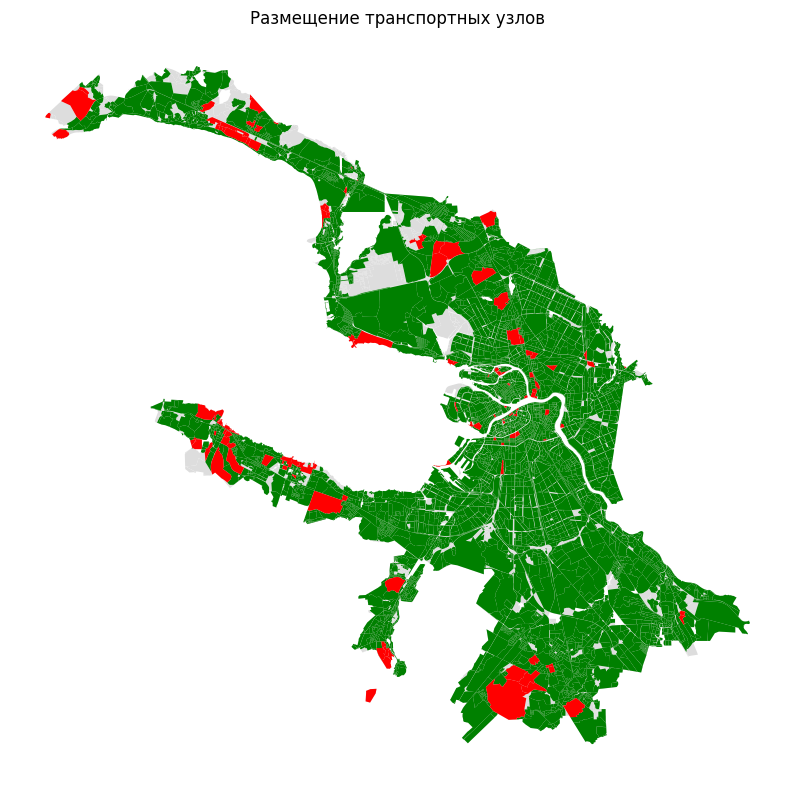

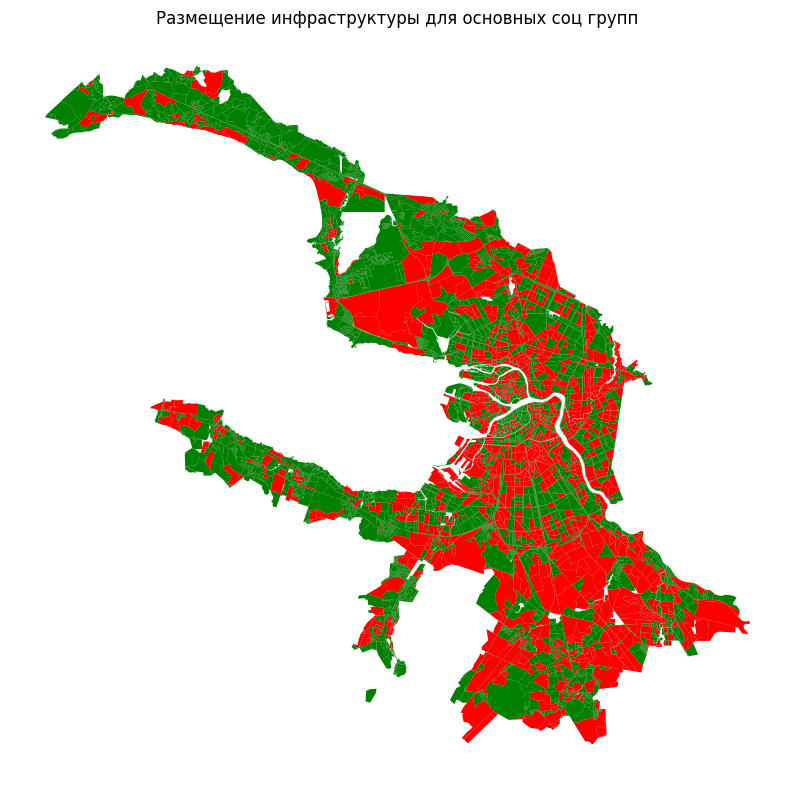

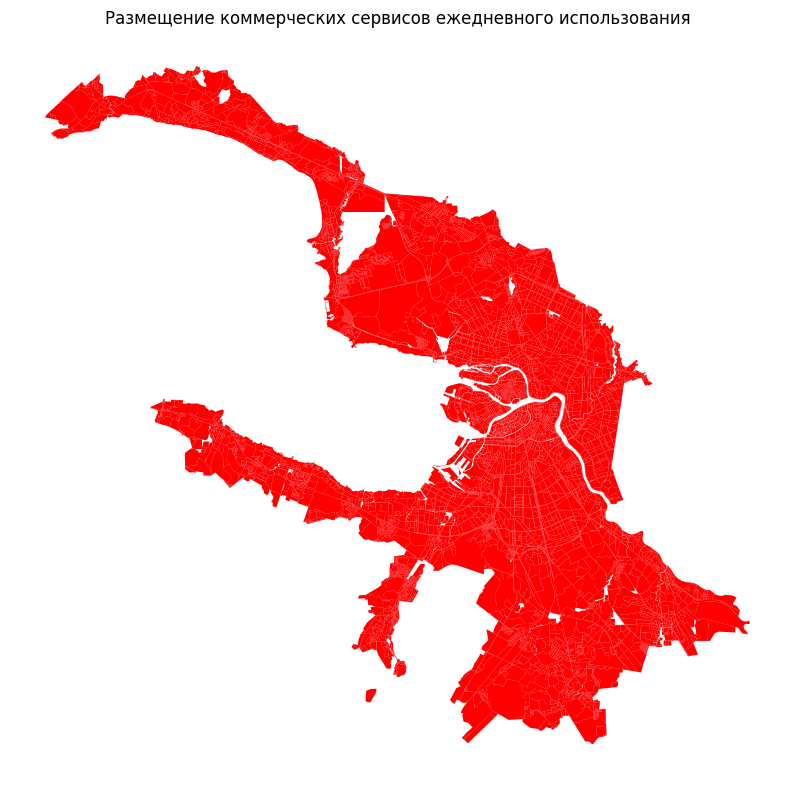

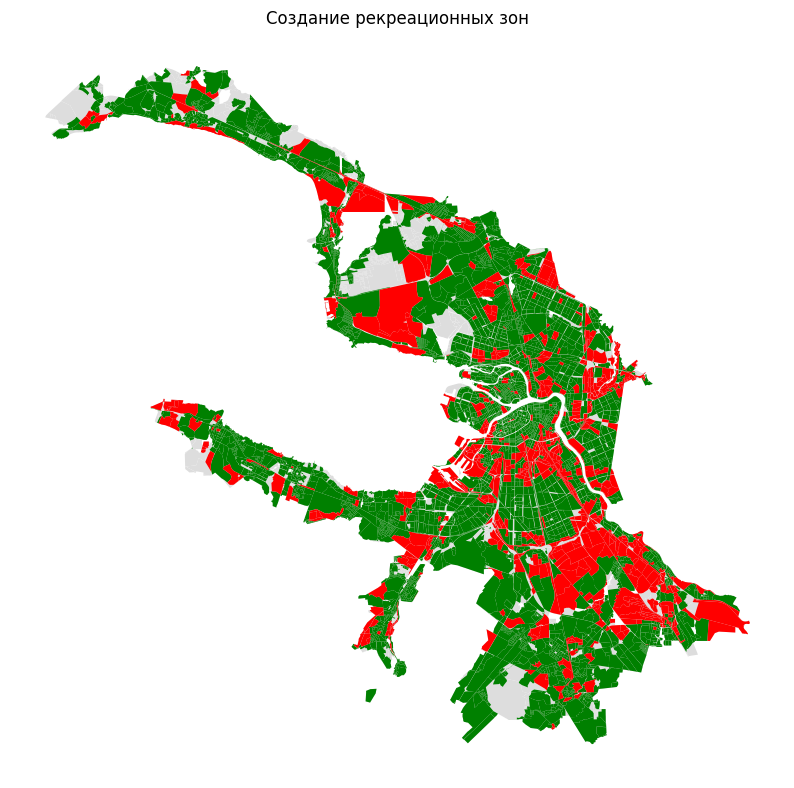

In [12]:
obligatory_requirements = {req for reqs in requirements_gdf['obligatory_requirements'] for req in reqs}
forbidden_requirements = {req for reqs in requirements_gdf['forbidden_requirements'] for req in reqs}
all_requirements = {*obligatory_requirements, *forbidden_requirements}

for req in all_requirements:
    ax = requirements_gdf.plot(figsize=(10,10), color='#ddd')
    requirements_gdf[requirements_gdf['obligatory_requirements'].apply(lambda reqs : req in reqs)].plot(color='green', ax=ax)
    requirements_gdf[requirements_gdf['forbidden_requirements'].apply(lambda reqs : req in reqs)].plot(color='red', ax=ax)
    ax.set_title(req.value)
    ax.set_axis_off()